In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd 'drive/My Drive/secom'

/content/drive/My Drive/secom


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv("secom.data",delimiter=" ", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [6]:
df.shape

(1567, 590)

In [7]:
# rename features as feature1, feature2 ...

feature_names = ['feature' + str(x) for x in range (1,591)]
df.columns = feature_names
df.head(3)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602


In [8]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [9]:
df_labels = pd.read_csv("secom_labels.data",header=None, delimiter=" ")
df_labels.columns = ['fault','timestamp']
df_labels.head(3)

,fault,timestamp
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00


In [10]:
df_labels.fault.value_counts()

fault
-1    1463
 1     104
Name: count, dtype: int64

In [11]:
df_labels.shape

(1567, 2)

In [12]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fault      1567 non-null   int64 
 1   timestamp  1567 non-null   object
dtypes: int64(1), object(1)
memory usage: 24.6+ KB


In [13]:
# Handeling the date and time values - Converting timestamp into date_time type
df_labels['timestamp']= pd.to_datetime(df_labels.timestamp, dayfirst=True)
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fault      1567 non-null   int64         
 1   timestamp  1567 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.6 KB


In [14]:
## Check duplicates. There are no duplicates.

df[df.duplicated()]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590


In [15]:
# Merge the datasets into one

df_merged = pd.merge(left = df, right = df_labels, left_index = True, right_index=True, how='inner', validate = "1:1")

In [16]:
# Let's look at Zero volatality columns (We can look at variance of standard_daviation)

variance_of_cols = df.var()

features_with_zero_variance = variance_of_cols[variance_of_cols == 0].index.to_list()
print("no. of features with zero variance = ",len(features_with_zero_variance))

no. of features with zero variance =  116


<Axes: ylabel='Count'>

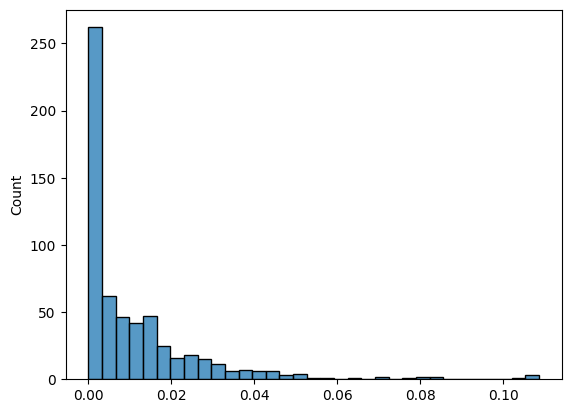

In [17]:
## Histogram of volatalities of features,
## to create a meaningful histogram - first scaling all variables using min-max scalar

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
df_normalised = pd.DataFrame(scaler.transform(df),columns = df.columns)

variance_of_cols_normalised = df_normalised.var()

sns.histplot(variance_of_cols_normalised)

## As expected, many variables with zero variance. and many more with little variance.

<Axes: ylabel='Count'>

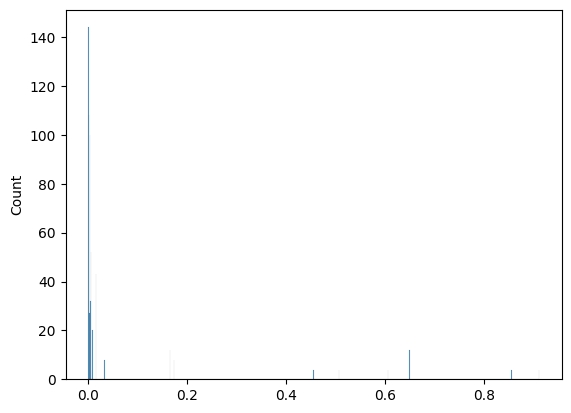

In [18]:
# histogram of percentage of missing values

percentage_of_null_values = df_normalised.isnull().sum()/df.shape[0]
sns.histplot(percentage_of_null_values)

In [19]:
## capture names of variables where null values are above a threshold

features_with_high_missing_values = percentage_of_null_values[percentage_of_null_values > .6].index.to_list()
print('no. of features with high (greater than 60) missing values - ',len(features_with_high_missing_values))

no. of features with high (greater than 60) missing values -  24


<Axes: >

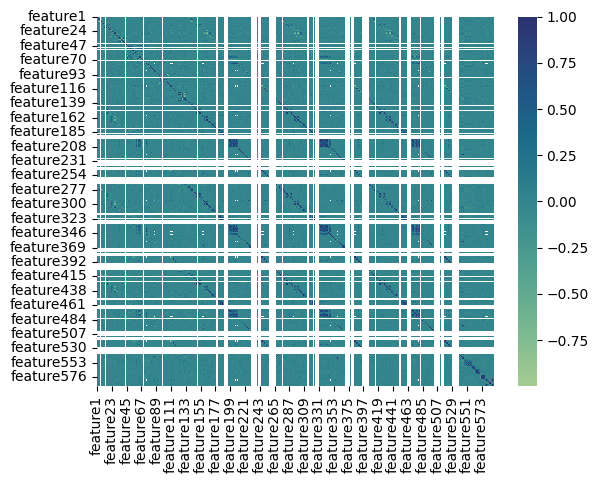

In [20]:
# correlation heatmap # many variables seem to have high correlation # Many cases of high correlation visible.

correlations_p = df_normalised.corr(method='pearson')
sns.heatmap(correlations_p, cmap="crest")

In [21]:
## Train - Test Split

## merge df and df_labels on index
df_merged = pd.merge(left = df_normalised, right = df_labels, left_index = True, right_index=True, how='inner', validate = "1:1")
X = df_merged.drop(['fault'],axis = 1)
y = df_merged[['fault']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

<Axes: ylabel='Count'>

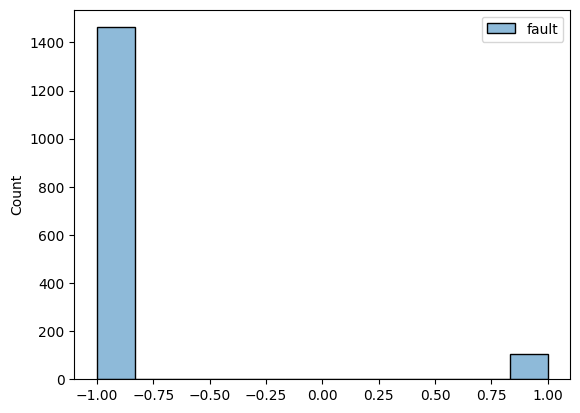

In [22]:
# Class balance before split

sns.histplot(y)

<Axes: ylabel='Count'>

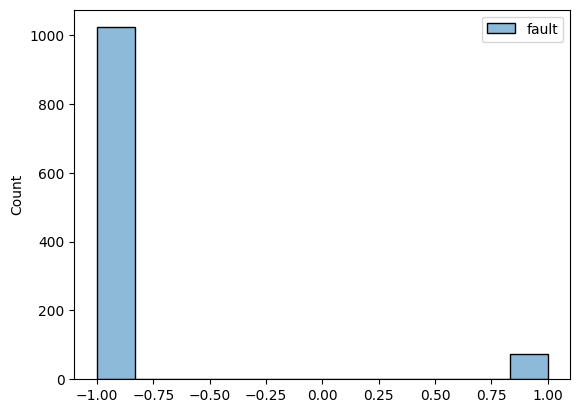

In [23]:
# Class balance after split

sns.histplot(y_train)

<Axes: ylabel='Count'>

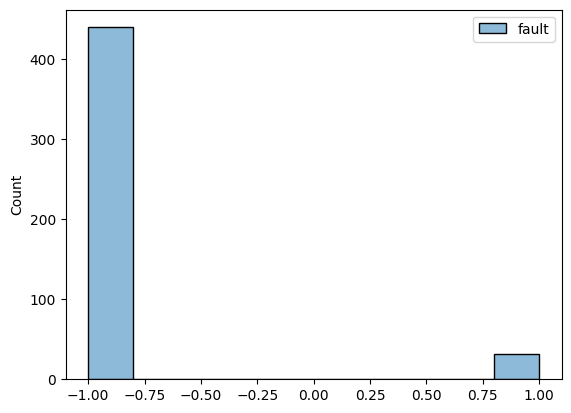

In [24]:
sns.histplot(y_test)

In [25]:
## class balance appears to be similar in case of training and testing datasets.

In [26]:
######## Cleaning of training set

In [27]:
# There were no duplicated row

In [28]:
# Save a copy
X_train_save = X_train.copy()

In [29]:
# Removing zero volatalities columns

X_train.drop(labels=features_with_zero_variance, axis=1, inplace=True)

In [30]:
# Removing variables with high missing values

X_train.drop(labels=features_with_high_missing_values, axis=1, inplace=True)

<Axes: ylabel='Count'>

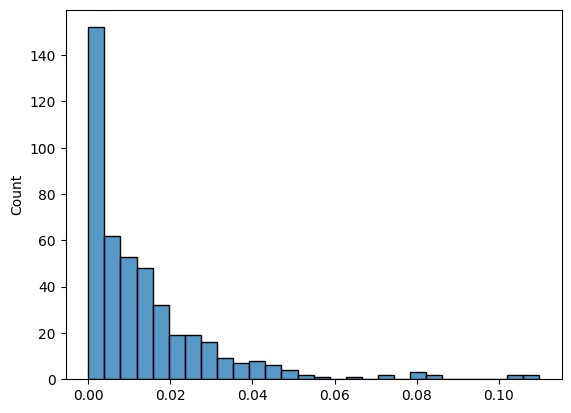

In [31]:
# Capture low volatilities columns
col_variances = X_train.drop(labels=['timestamp'],axis=1).var()
sns.histplot(col_variances)

In [32]:
##  Still many columns have low variance.
# capturing column names with low variance

cols_with_less_variance = col_variances[col_variances < 0.004].index.to_list()
print('no. of cols with less variance = ',len(cols_with_less_variance))

no. of cols with less variance =  154


<Axes: >

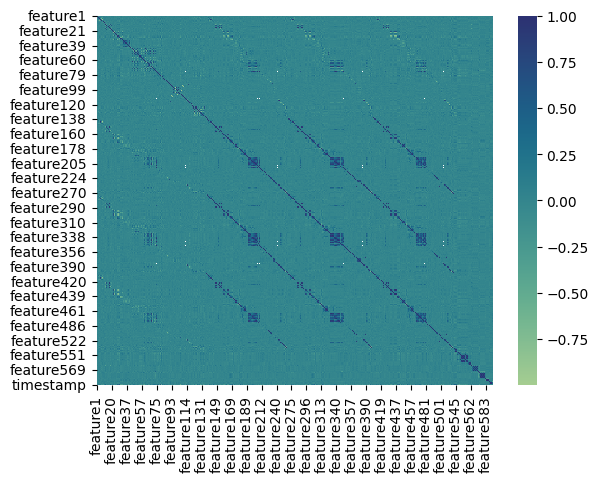

In [33]:
## Let's look at correlation heatmap again # Many highly correlated variables as expected.

correlations_p = X_train.corr(method='pearson')
sns.heatmap(correlations_p, cmap="crest")

In [39]:
## Outlier Treatment

dict_of_no_of_outliers = {}
X_train_out_treated = pd.DataFrame()

for feat in X_train.columns:
  col_series = X_train[feat]
  mean = col_series.mean()
  std = col_series.std()
  new_series = (col_series - mean) / std # z-score
  num_outliers= col_series[((new_series > 3) | (new_series  < -3)) ].shape[0]
  dict_of_no_of_outliers[feat] = num_outliers
  upper_cap = mean + (3* std)
  lower_cap = mean - (3 * std)
  outlier_treated = np.select([col_series > upper_cap, col_series < lower_cap]
                              ,[upper_cap,lower_cap ]
                             ,col_series)
  X_train_out_treated[feat] = outlier_treated

print("outliers treated as below")
dict_of_no_of_outliers

<ipython-input-39-cfb296daf419>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_out_treated[feat] = outlier_treated
<ipython-input-39-cfb296daf419>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_out_treated[feat] = outlier_treated
<ipython-input-39-cfb296daf419>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame,

outliers treated as below


<ipython-input-39-cfb296daf419>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_out_treated[feat] = outlier_treated
<ipython-input-39-cfb296daf419>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_out_treated[feat] = outlier_treated


{'feature1': 13,
 'feature2': 12,
 'feature3': 11,
 'feature4': 20,
 'feature5': 4,
 'feature7': 14,
 'feature8': 8,
 'feature9': 2,
 'feature10': 8,
 'feature11': 12,
 'feature12': 2,
 'feature13': 4,
 'feature15': 5,
 'feature16': 3,
 'feature17': 1,
 'feature18': 2,
 'feature19': 6,
 'feature20': 9,
 'feature21': 7,
 'feature22': 19,
 'feature23': 20,
 'feature24': 23,
 'feature25': 25,
 'feature26': 24,
 'feature27': 27,
 'feature28': 25,
 'feature29': 0,
 'feature30': 7,
 'feature31': 6,
 'feature32': 1,
 'feature33': 20,
 'feature34': 10,
 'feature35': 24,
 'feature36': 26,
 'feature37': 24,
 'feature38': 27,
 'feature39': 52,
 'feature40': 28,
 'feature41': 0,
 'feature42': 4,
 'feature44': 6,
 'feature45': 7,
 'feature46': 8,
 'feature47': 3,
 'feature48': 1,
 'feature49': 3,
 'feature51': 2,
 'feature52': 0,
 'feature54': 8,
 'feature55': 6,
 'feature56': 5,
 'feature57': 9,
 'feature58': 6,
 'feature59': 9,
 'feature60': 3,
 'feature61': 4,
 'feature62': 11,
 'feature63': 8,


In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 假设 X_train 已经定义

# 对 X_train 进行标准化并保存参数
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

# 检查 X_train_cleaned 中是否存在基于 X_train 标准化参数的异常值
scaled_X_train_cleaned = scaler.transform(X_train_cleaned)

# 计算 z 值
z_scores_cleaned = scaled_X_train_cleaned

# 检查是否存在超过阈值的 z 值
threshold = 3
outliers_positive = z_scores_cleaned > threshold
outliers_negative = z_scores_cleaned < -threshold

# 合并正负异常值
outliers = np.logical_or(outliers_positive, outliers_negative)

# 打印存在异常值的情况
if np.any(outliers):
    print("Outliers detected in the dataset.")
    print(f"Number of outliers: {np.sum(outliers)}")
    # 打印出异常值所在的位置和值
    outlier_indices = np.where(outliers)
    outlier_values = z_scores_cleaned[outliers]
    print("Indices of outliers:", outlier_indices)
    print("Values of outliers:", outlier_values)
else:
    print("No outliers detected in the dataset.")


In [44]:
outliers_df = pd.DataFrame(dict_of_no_of_outliers.items(),columns = ['feature_name','num_outliers'])

<Axes: xlabel='num_outliers', ylabel='Count'>

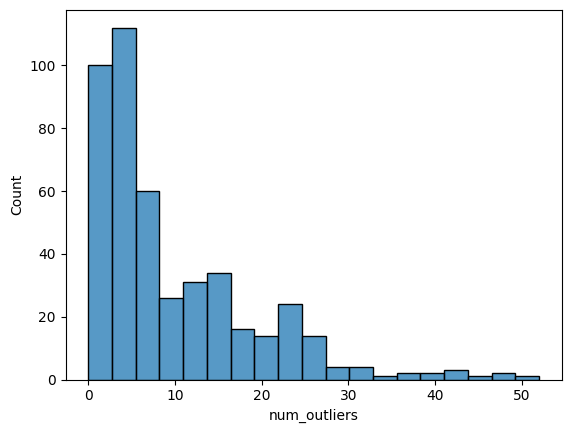

In [46]:
sns.histplot(outliers_df.num_outliers)